In [1]:
NAME = "Leonardo Passos Fida"
COLLABORATORS = ""

# Autocorrelation analysis of stock prices

In [2]:
# all imports and env variables
import datetime
import pandas as pd
import numpy as np
from pandas.tseries.offsets import Day,MonthEnd
from pandas.plotting import autocorrelation_plot
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
pd.core.common.is_list_like = pd.api.types.is_list_like
rcParams['figure.figsize']=15,6
start = datetime.datetime(2016, 2, 1)
end = datetime.datetime(2021, 2, 14)

The start and end dates were chosen so that the stock prices for the last 60 months can be analyzed. Since the coding for this assignment was done in February 14, the end date for the four stocks was chosen to be the same.

The datasets which correspond to the adjusted close price for stock data of the four companies listed (Amazon, Facebook, IBM and 3M) can be imported according to the following commands:

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
amazon = pdr.get_data_yahoo('AMZN', start = start,end=end)
ibm=pdr.get_data_yahoo('IBM', start = start,end=end)
fb=pdr.get_data_yahoo('FB', start = start,end=end)
mmm=pdr.get_data_yahoo('MMM', start = start,end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


As an example, we can explore the head and tail of the Amazon stock price DataFrame:

In [4]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-01,578.150024,581.799988,570.309998,574.809998,574.809998,6355100
2016-02-02,570.000000,571.559998,550.090027,552.099976,552.099976,6312000
2016-02-03,553.500000,556.000000,521.900024,531.070007,531.070007,10048700
2016-02-04,525.000000,538.989990,519.219971,536.260010,536.260010,6199100
2016-02-05,529.280029,529.450012,499.190002,502.130005,502.130005,9708900


In [5]:
amazon.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-08,3358.50000,3365.000000,3304.000000,3322.939941,3322.939941,3257400
2021-02-09,3312.48999,3338.000000,3297.840088,3305.000000,3305.000000,2203500
2021-02-10,3314.00000,3317.949951,3254.000000,3286.580078,3286.580078,3151600
2021-02-11,3292.00000,3292.000000,3248.060059,3262.129883,3262.129883,2295800
2021-02-12,3250.00000,3280.250000,3233.310059,3277.709961,3277.709961,2329300


The first analysis we can do is to check for any missing values in all four DataFrames. This can be performed with the use of heatmaps:

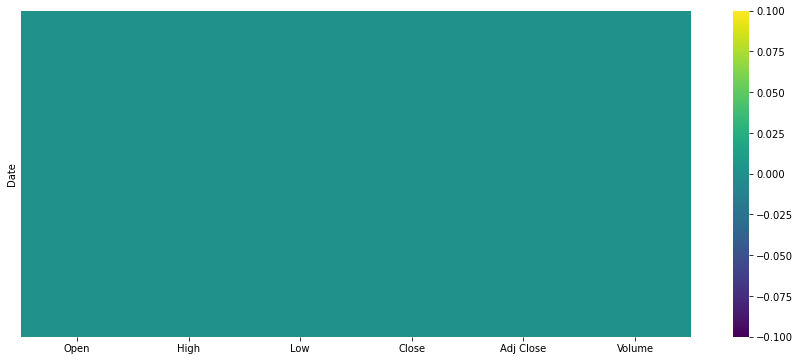

In [6]:
sns.heatmap(ibm.isnull(),yticklabels=False,cmap="viridis");

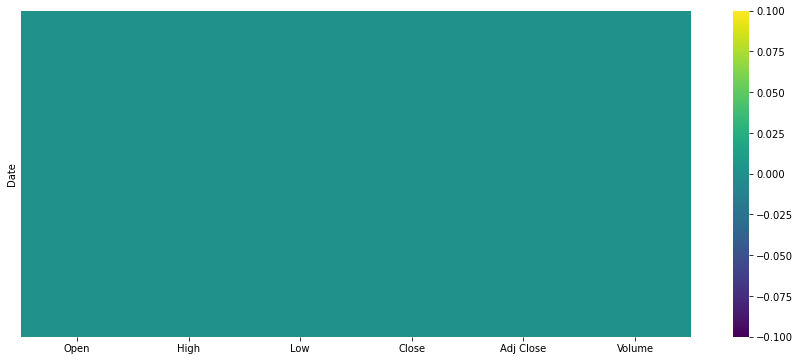

In [7]:
sns.heatmap(amazon.isnull(),yticklabels=False,cmap="viridis");

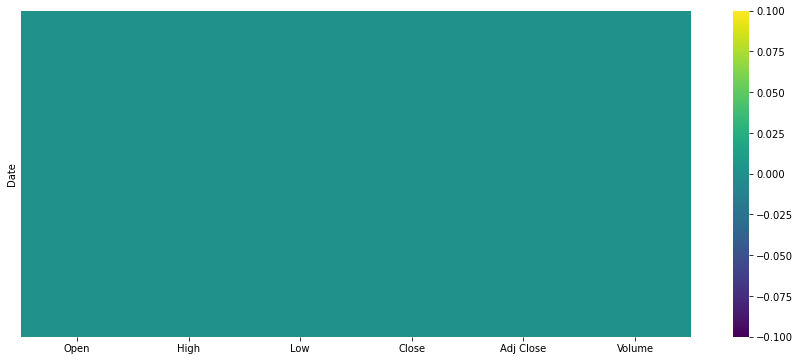

In [8]:
sns.heatmap(fb.isnull(),yticklabels=False,cmap="viridis");

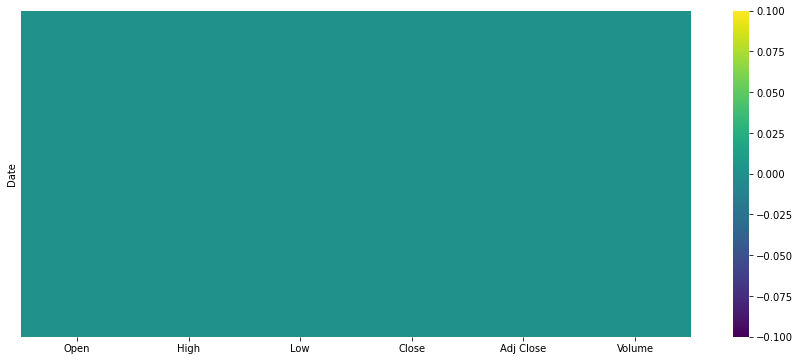

In [9]:
sns.heatmap(mmm.isnull(),yticklabels=False,cmap="viridis");

Since none of the heatmaps shows a missing value in the plot area, we can start other pertinent analyses.

At this step, we can check in the DataFrames whether the index "Date" contains an actual datetime value or a string value. Performing this check for the Amazon DataFrame:

In [10]:
amazon.index

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10',
               '2016-02-11', '2016-02-12',
               ...
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-08', '2021-02-09', '2021-02-10',
               '2021-02-11', '2021-02-12'],
              dtype='datetime64[ns]', name='Date', length=1269, freq=None)

As it can clearly be seen from above, the type of variable on the index "Date" of the DataFrames is already datetime. Hence, we do not need to perform any variable transformations on any index of the stock DataFrames.

At this step, we can perform a resample of the data in the DataFrames to get stock prices for the end of the business month, which is also called downsampling. For business month end, we can apply the .last() function, in order to find the adjusted close stock price at the end of each month:

In [11]:
amazon_monthend=amazon.resample('BM').last()
ibm_monthend=ibm.resample('BM').last()
fb_monthend=fb.resample('BM').last()
mmm_monthend=mmm.resample('BM').last()

Checking the head of the Amazon new DataFrame with resampling as an example:

In [12]:
amazon_monthend.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-29,554.000000,564.809998,552.510010,552.520020,552.520020,4145400
2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
2016-04-29,666.000000,669.979980,654.000000,659.590027,659.590027,10310700
2016-05-31,712.330017,724.229980,711.320007,722.789978,722.789978,3618300
2016-06-30,717.200012,719.369995,712.539978,715.619995,715.619995,2855100


We only need to select the "Adj Close" column of each resampled DataFrame, in order to have a Series for each stock on the adjusted close stock price:

In [13]:
amazon_monthend=amazon_monthend.loc[:,'Adj Close']
ibm_monthend=ibm_monthend.loc[:,'Adj Close']
fb_monthend=fb_monthend.loc[:,'Adj Close']
mmm_monthend=mmm_monthend.loc[:,'Adj Close']

Checking the head of the Amazon Series:

In [14]:
amazon_monthend.head(10)

Date
2016-02-29    552.520020
2016-03-31    593.640015
2016-04-29    659.590027
2016-05-31    722.789978
2016-06-30    715.619995
2016-07-29    758.809998
2016-08-31    769.159973
2016-09-30    837.309998
2016-10-31    789.820007
2016-11-30    750.570007
Freq: BM, Name: Adj Close, dtype: float64

At this step, we can start plotting the Autocorrelation graphs. Basically, if the correlation is very strong and positive, it will be +1, if it is very strong and negative, it will be -1, and if there is no correlation, it will be 0.

Plotting the autocorrelation for the Amazon stock:

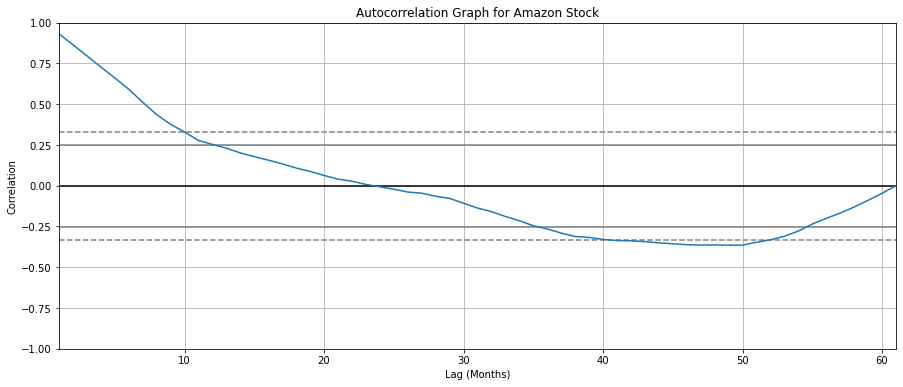

In [15]:
autocorrelation_plot(amazon_monthend);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for Amazon Stock');

As we can observe from the graph above, the dotted lines are between values of correlation of -0.3 and 0.3. This will indicate the significance of the correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the adjusted close value is autocorrelated to previous stock close values. In this plot from above, we can see that for the lag of 10 months and below, there is a strong positive autocorrelation between stock price values for Amazon. Then, from month lag 10 onward, the correlation line lies between the horizontal dashed lines, with the exception of a small range between month lags 40 and 52. This means that, for month lag 10 until 42, the adjusted close price of Amazon stock is not autocorrelated to itself in time or, in other words, the future values of stock are not influenced by previous values. For the month lag period of 40 until 52, the adjusted close price is negatively autocorrelated (inversely proportional behaviour), which is the same to say that the future stock price is more likely to be below average if the current price is above average and vice versa.

Performing the same procedure on the IBM stock Series:

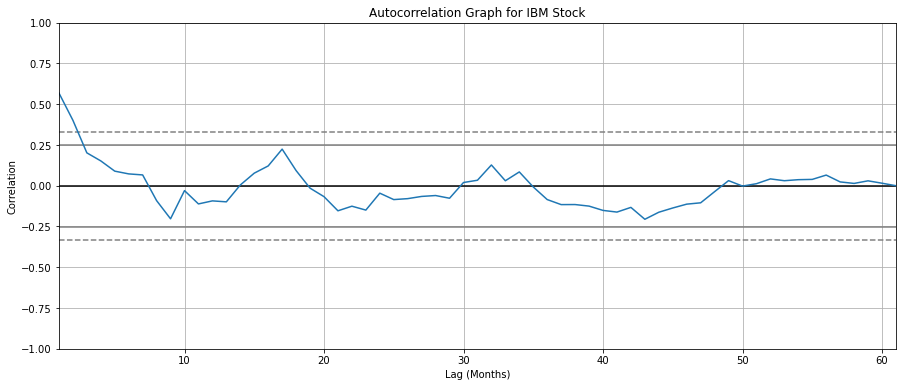

In [16]:
autocorrelation_plot(ibm_monthend);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for IBM Stock');

In the plot from above, we can see that for the lag of approximately under 2 months, there is a medium to strong positive correlation between stock price and time. Then, from lag 2 onward, we cannot say that there are any significant values that show any correlation, because the autocorrelation line will be between the dotted lines.

Now, for the Facebook stock:

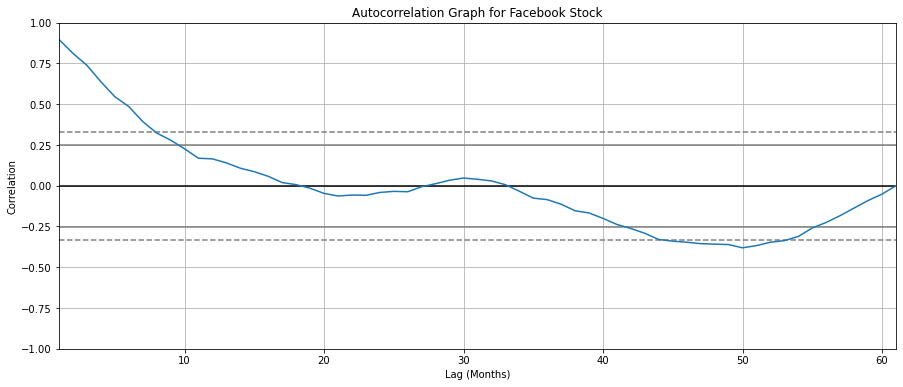

In [17]:
autocorrelation_plot(fb_monthend);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for Facebook Stock');

A similar behaviour is observed for the Facebook adjusted stock prices. For the time month lag of approximately 8 and under, we can observe a strong positive correlation between stock price and time, which can also be observed between the time lags of 43 and 52 (the correlation is weak and negative for this time lag range). Nevertheless, the great majority of the autocorrelation line lies between the dotted lines. In this region, there will be no significant autocorrelation between stock prices for Facebook.

Another point that is worth mentioning is that, for the lag period of 0, the autocrrelation value always will be equivalent to 1, because this point represents the autocorrelation between each term and itself.

Finally, performing the same procedure for the 3M stock data:

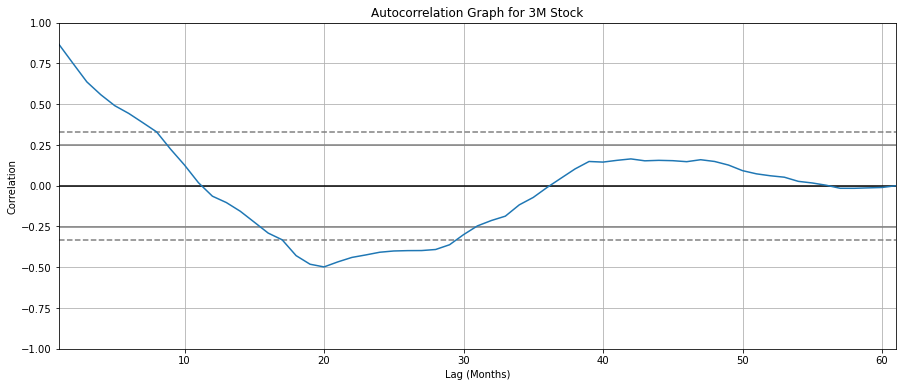

In [18]:
autocorrelation_plot(mmm_monthend);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for 3M Stock');

For the time month lag of approximately 8 and under, we can observe a strong positive correlation between stock price and time, which can also be observed between the time lags of 17 and 29 (but in this interval, the correlation is negative). Nevertheless, the great majority of the autocorrelation line lies between the dotted lines. In this region, there will be no significant autocorrelation between stock prices for 3M.

At this step, we can determine the monthly returns for each stock, using the "shift trick" or shift() function:

In [19]:
amazon_return=amazon_monthend/amazon_monthend.shift(1)-1
ibm_return=ibm_monthend/ibm_monthend.shift(1)-1
fb_return=fb_monthend/fb_monthend.shift(1)-1
mmm_return=mmm_monthend/mmm_monthend.shift(1)-1

Checking the head of the Amazon return Series as an illustration:

In [20]:
amazon_return.head(10)

Date
2016-02-29         NaN
2016-03-31    0.074423
2016-04-29    0.111094
2016-05-31    0.095817
2016-06-30   -0.009920
2016-07-29    0.060353
2016-08-31    0.013640
2016-09-30    0.088603
2016-10-31   -0.056717
2016-11-30   -0.049695
Freq: BM, Name: Adj Close, dtype: float64

We can clearly see from the Series above that there are missing values. Hence, we must first make sure that none of the Series of monthly returns contains mssing values:

In [21]:
amazon_return=amazon_return.dropna()
ibm_return=ibm_return.dropna()
fb_return=fb_return.dropna()
mmm_return=mmm_return.dropna()
amazon_return=amazon_return.rename('Amazon')
ibm_return=ibm_return.rename('IBM')
fb_return=fb_return.rename('Facebook')
mmm_return=mmm_return.rename('3M')

Now, plotting the autocorrelation graphs for the monthly returns Series for all four stocks:

For the Amazon stock:

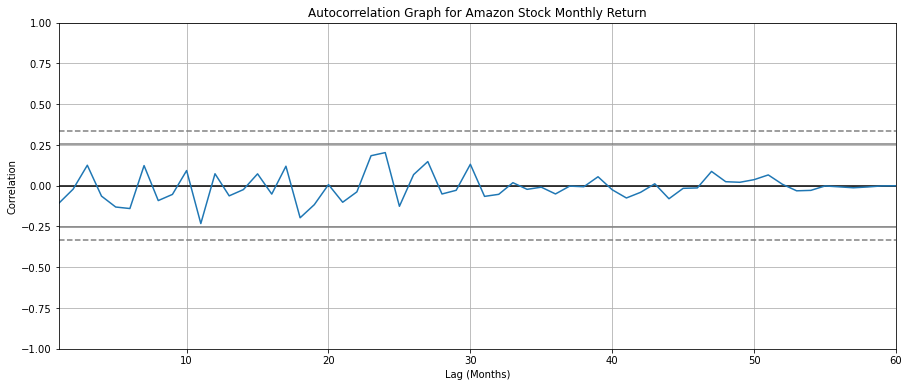

In [22]:
autocorrelation_plot(amazon_return);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for Amazon Stock Monthly Return');

For the IBM stock:

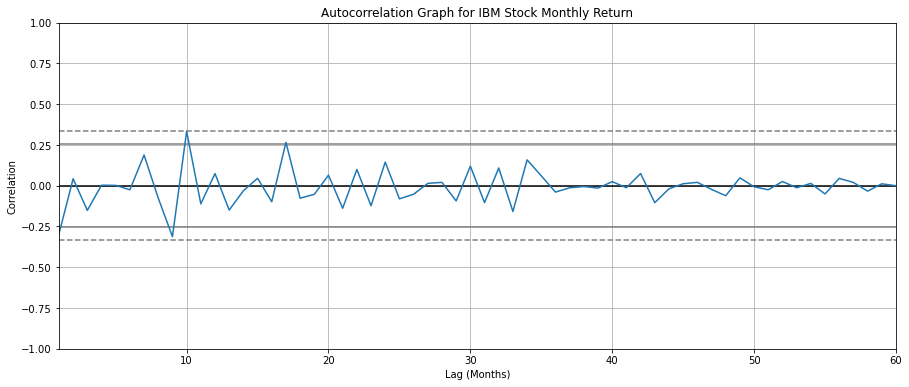

In [23]:
autocorrelation_plot(ibm_return);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for IBM Stock Monthly Return');

For the Facebook stock:

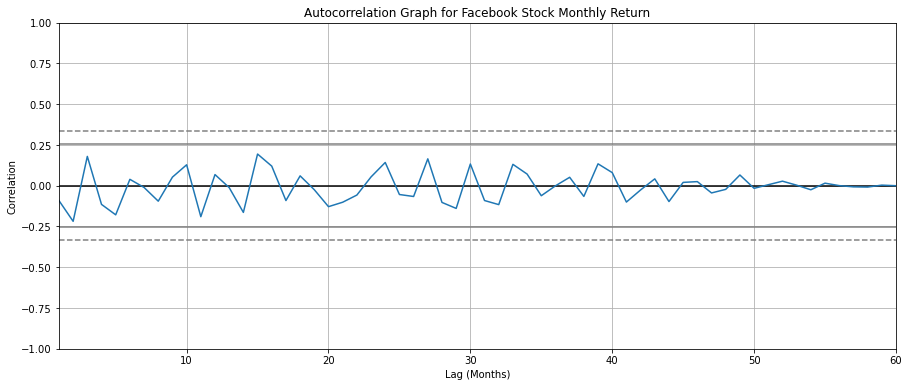

In [24]:
autocorrelation_plot(fb_return);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for Facebook Stock Monthly Return');

Finally, for the 3M stock:

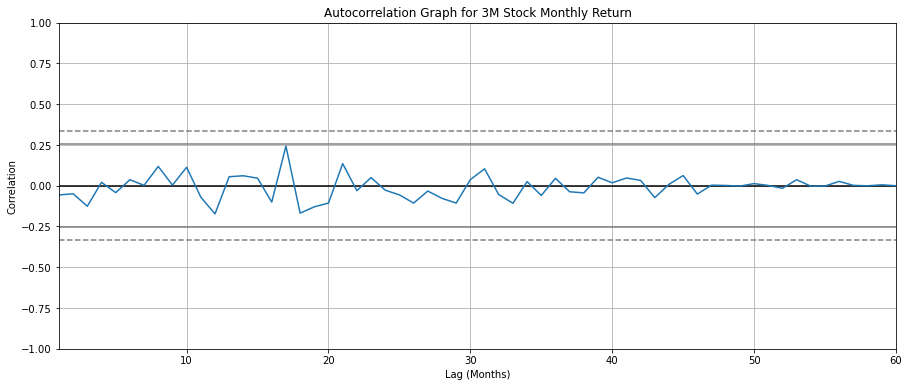

In [25]:
autocorrelation_plot(mmm_return);
plt.ylabel('Correlation');
plt.xlabel('Lag (Months)');
plt.title('Autocorrelation Graph for 3M Stock Monthly Return');

We can clearly see that, for all four stock returns, the autocorrelation line stays very close to the X-axis or 0 value (between the horizontal dashed lines). Hence, we can conclude that there is no significant trend seen in the month end returns, the values are randomly distributed, and that the stock price returns are not affected by the time, which is the same to say that the monthly returns are not autocorrelated.

Finally, we can combine all four return time series into a single DataFrame by using the pd.concat() method:

In [26]:
returns=pd.concat([amazon_return,ibm_return,fb_return,mmm_return],axis=1)

Checking the head of the resulting DataFrame:

In [27]:
returns.head(10)

,Amazon,IBM,Facebook,3M
Date,,,,
2016-03-31,0.074423,0.155842,0.067153,0.062217
2016-04-29,0.111094,-0.036382,0.030500,0.004501
2016-05-31,0.095817,0.063613,0.010461,0.012312
2016-06-30,-0.009920,-0.012749,-0.038128,0.040399
2016-07-29,0.060353,0.058243,0.084529,0.018502
2016-08-31,0.013640,-0.002290,0.017589,0.011196
2016-09-30,0.088603,-0.000189,0.017047,-0.016793
2016-10-31,-0.056717,-0.032484,0.021205,-0.062021
2016-11-30,-0.049695,0.065077,-0.095962,0.045621


We can now visualize the correlation between the returns of all pairs of stocks by building a scatter plot matrix:

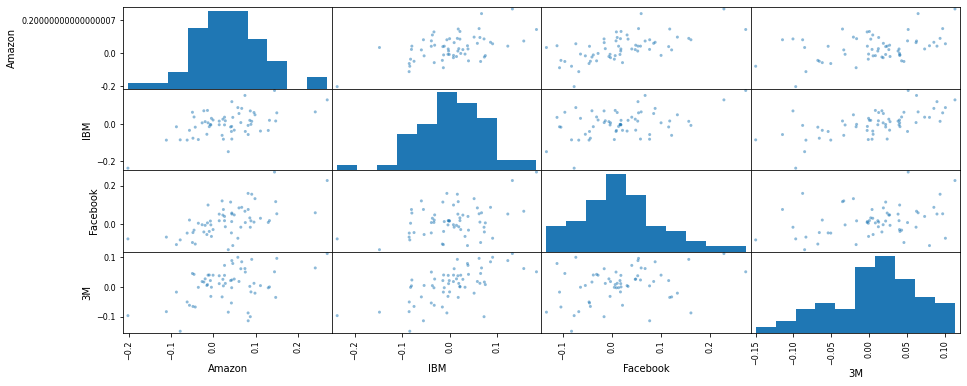

In [28]:
pd.plotting.scatter_matrix(returns);

The same graphs can be achieved with the pairplot() method using the seaborn library:

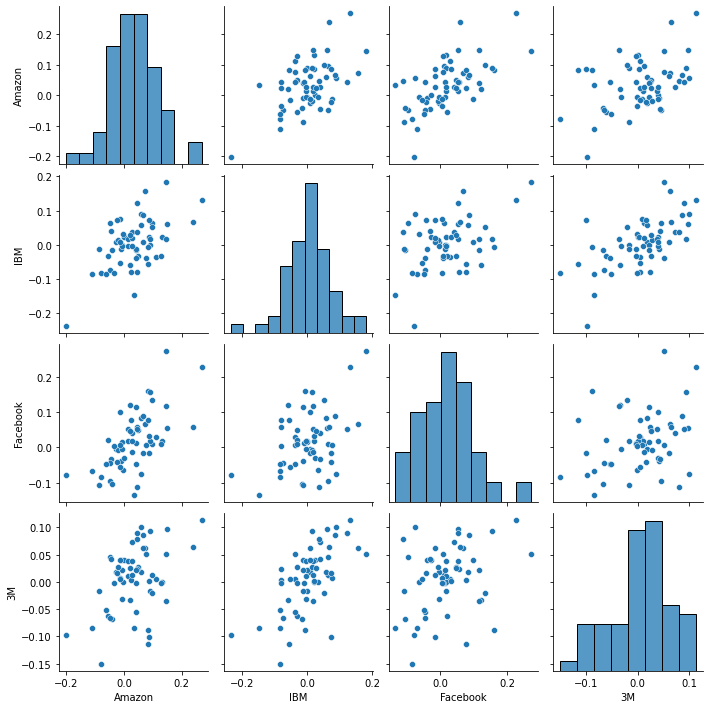

In [29]:
sns.pairplot(returns);

Analyzing the graphs above, we can conclude that the pairs of stock returns do not show a strong positive correlation between them. This means that as one stock return grows, the other generally also grows, weakly. However, this positive correlation is not strong, because the scatter plots of returns show data points that are scattered all over the plot area and, hence, do not show a clear linear positive relationship between the variables plotted.

In order to visualize the values of correlation between the pairs of stocks, we can use the .corr() method:

In [30]:
returns.corr()

,Amazon,IBM,Facebook,3M
Amazon,1.000000,0.542420,0.619618,0.417613
IBM,0.542420,1.000000,0.416472,0.631983
Facebook,0.619618,0.416472,1.000000,0.305183
3M,0.417613,0.631983,0.305183,1.000000


We can clearly ignore the main diagonal of the table above, since it displays the correlation of one stock to itself, which will be clearly 1. The pairs of stocks which show the highest correlation are between IBM and 3M, along with Amazon and Facebook. The pairs of stocks which show the lowest correlation are between Facebook and 3M, along with Facebook and IBM.